<a href="https://colab.research.google.com/github/TwinFrozr51/NN_labs/blob/main/%D0%9B%D0%B0%D0%B1%D0%B03_%D0%9E%D0%B4%D0%B8%D1%88%D0%BE_%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача 1. Реализовать слой с функцией активации "сигмоида"


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output

In [ ]:
class SigmoidLayer():
    def __init__(self):
        self.params = []
        self.gradInput = None
        pass

    def forward(self, X):
        self.X = X.copy()
        output = 1 / (1 + np.exp(-X))
        return output
        pass
    
    def backward(self, dout):
        self.gradInput = dout.copy()
        a = 1/(1 + np.exp(-self.X))
        self.gradInput = self.gradInput*a*(1-a)
        return self.gradInput, []

In [ ]:
np.random.seed(17)

X = np.random.random(size=(100, 3))
sigmoid = SigmoidLayer()
output = sigmoid.forward(X)
correct_answer = np.array([[0.57313782, 0.62961995, 0.54773438],
                           [0.51696857, 0.68718368, 0.65843628],
                           [0.65419284, 0.64005501, 0.50976449],
                           [0.58851107, 0.7202462 , 0.51500666],
                           [0.70350447, 0.70626044, 0.51279562]])
assert np.isclose(output[:5], correct_answer).all()
assert hasattr(sigmoid, "params"), "Нет параметра params в реализованном классе"
assert hasattr(sigmoid, "gradInput"), "Нет параметра gradInput в реализованном классе"
assert hasattr(sigmoid, "X"), "Не сохранили X в реализованном классе"


dout = np.random.random(size=(100, 3))
dInput, _ = sigmoid.backward(dout)
correct_dInput = np.array([[0.19460589, 0.20407074, 0.17488009],
                           [0.1656316 , 0.10298473, 0.08073351],
                           [0.21590141, 0.1403435 , 0.21416212],
                           [0.21320927, 0.03610846, 0.05416308],
                           [0.00737656, 0.03121984, 0.02882668]])
assert np.isclose(dInput[:5], correct_dInput).all()

Задача 2. Реализовать слой с активацией гиперболического тангенса

In [ ]:
class TanhLayer():
    def __init__(self):
        self.params = []
        self.gradInput = None
        pass

    def forward(self, X):
        self.X = X.copy()
        output = np.tanh(X)
        return output
        pass
    
    def backward(self, dout):
        self.gradInput = dout.copy()
        a = (np.exp(self.X) - np.exp(-self.X)) / (np.exp(self.X) + np.exp(-self.X))
        self.gradInput = self.gradInput*(1-a*a)
        return self.gradInput, []
        pass

In [ ]:
np.random.seed(17)

X = np.random.random(size=(100, 3))
tanh = TanhLayer()
output = tanh.forward(X)
correct_answer = np.array([[0.28642281, 0.48582948, 0.18921297],
                           [0.0677962 , 0.65669792, 0.57591821],
                           [0.5632092 , 0.51946218, 0.03904306],
                           [0.34328675, 0.73782249, 0.05997262],
                           [0.69833441, 0.70505935, 0.05114899]])
assert np.isclose(output[:5], correct_answer).all()
assert hasattr(tanh, "params"), "Нет параметра params в реализованном классе"
assert hasattr(tanh, "gradInput"), "Нет параметра gradInput в реализованном классе"
assert hasattr(tanh, "X"), "Не сохранили X в реализованном классе"


dout = np.random.random(size=(100, 3))
dInput, _ = tanh.backward(dout)
correct_dInput = np.array([[0.7301867 , 0.66854527, 0.68068037],
                           [0.66024164, 0.27247731, 0.23991181],
                           [0.65163784, 0.44479135, 0.85566899],
                           [0.77667226, 0.08164937, 0.21606773],
                           [0.01811832, 0.07567937, 0.11508041]])
assert np.isclose(dInput[:5], correct_dInput).all()

Задача 3. Реализовать функцию потерь MSE

In [ ]:
class MSELoss():
    def forward(self, y_true, y_pred):
        mse = np.mean(np.square(y_true - y_pred))
        return mse
    
    def backward(self, y_true, y_pred):
        n = len(y_pred)
        mse = (1 / n) * -2 * (y_true - y_pred)
        return mse
        pass

In [ ]:
np.random.seed(17)

y_true = np.random.randint(0, 1000, size=(100))
y_pred = np.random.randint(0, 1000, size=(100))
mse = MSELoss()
output = mse.forward(y_true, y_pred)
correct_answer = 157953.51
assert round(output) == round(correct_answer)

dout = mse.backward(y_true, y_pred)
right_dout = np.array([3.56, 1.24, 10.2, 7.68, 3.02, 9.04, -12.84, -2.16, 3.04, 0.24])
assert np.isclose(dout[:10], right_dout).all()
assert round(dout.sum(), 3) == 19.26

Задача 4. Реализовать каркас нейросети

In [ ]:
class LinearLayer:

    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size)
        self.params = [self.W]
        self.gradW = None
        self.gradInput = None
        
    def forward(self, X):
        self.X = X.copy()
        output = X.dot(self.W)
        return output
    
    def backward(self, dout):
        self.gradW = self.X.T.dot(dout)
        self.gradInput = dout.dot(self.W.T)
        return self.gradInput, [self.gradW]


class NN:
    def __init__(self, loss_func):
        """
        Необходимо, чтобы нейросеть знала все о своей конфигурации.
        1. Создайте внутренние переменные layers, params и grads как пустые листы.
        2. Во внутреннюю переменную loss_func положите значение полученной переменной loss_func.
        """
        self.layers, self.params, self.grads = [], [], []
        self.loss_func = loss_func
        pass

    def add_layer(self, layer):
        """
        Функция добавления слоев в нейросеть.
        Необходимо, чтобы обновлялись (расширялись) внутренние переменные,
        ответственные за слои и параметры этих самых слоев, которые мы инициализировали
        в __init__ методе.
        """
        self.layers.append(layer)
        self.params.append(layer.params)
        pass

    def forward(self, X):
        """
        Реализовать forward pass для всей нейросети.
        Т.е. реализовать forward pass по каждому слою, и в конце выдать результат 
        """
        for layer in self.layers:
            X = layer.forward(X)
        return X
        pass
    
    def backward(self, dout):
        """
        Реализовать backward pass для всей нейросети.
        Т.е. реализовать backward pass по каждому слою в обратном порядке
        Каждый слой возвращает dout (проталкиваем градиент далее) 
        и grad (градиенты параметров для их обновления)
        Все полученные градиенты параметров необходимо добавить во внутреннюю 
        переменную self.grads
        В конце необходимо вернуть self.grads
        В начале необходимо обнулять градиенты
        """
        self.clear_grad_param()
        for layer in reversed(self.layers):
            dout, grad = layer.backward(dout)
            self.grads.append(grad)
        return self.grads

    def train_step(self, X, y):
        """
        Функция для проведения одного шага тренировки модели
        
        Что необходимо сделать:
        1. Пропустить полученные данные через сеть
        2. Получить значение loss функции
        3. Получить градиенты loss функции
        4. Полученные от loss функции градиенты запустить в сеть назад
        
        Возвращаем значение лосс функции из пункта 2 и градиенты из пункта 4.
        """
        y_true = self.forward(X)
        loss = self.loss_func.forward(y_true, y)
        dout = self.loss_func.backward(y_true, y)
        grads = self.backward(dout)
        for arr in grads:
            for i in range(len(arr)):
                arr[i] *= -1
        return loss, grads

    def predict(self, X):
        """
        Функция для предсказания при заданных Х.
        По большому счету, необходимо просто прогнать forward pass
        и вернуть полученные значения.
        """
        return self.forward(X)
        pass
    
    def dispGradParam():
        """
        Функция для принта градиентов, уже готовая
        """
        print(self.grads)
    
    def clear_grad_param(self):
        """
        Функция для очищения градиентов, уже готовая
        """
        self.grads = []
    
    
nn = NN(MSELoss())

assert hasattr(nn, "layers")
assert hasattr(nn, "params")
assert hasattr(nn, "grads")
assert hasattr(nn, "loss_func")
assert isinstance(nn.loss_func, MSELoss)

In [ ]:
np.random.seed(17)

X = np.random.random(size=(100, 3))
nn = NN(MSELoss())

linear1 = LinearLayer(3, 5)
nn.add_layer(linear1)

sigmoid1 = SigmoidLayer()
nn.add_layer(sigmoid1)

linear2 = LinearLayer(5, 1)
nn.add_layer(linear2)

sigmoid2 = SigmoidLayer()
nn.add_layer(sigmoid2)

output_nn = nn.forward(X)

assert round(output_nn.sum()) == 65


y = np.random.randint(0, 2, size=100).reshape(-1, 1)

nn_predict = nn.predict(X)
assert (output_nn == nn.predict(X)).all()

loss, grads = nn.train_step(X, y)
right_loss = np.array([0.24705916])

assert np.isclose(loss, right_loss)
assert grads[0] == []
assert round(grads[1][0].sum(), 4) == 0.0394
assert grads[2] == []
assert round(grads[3][0].sum(), 4) == 0.0077

Задача 4.1. Реализовать нарезку датасета на минибатчи

In [ ]:
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, ]
        y_batch = y[i:i + minibatch_size, ]
        minibatches.append((X_batch, y_batch))
    return minibatches
    pass

In [ ]:
np.random.seed(17)

BATCH_SIZE = 33
X = np.random.random(size=(100, 3))
y = np.random.randint(0, 2, size=100).reshape(-1, 1)

minibatches = minibatch(X, y, BATCH_SIZE)
X_batch0, y_batch0 = minibatches[0]
correct_y_batch0 = np.array([[0], [0], [0], [1], [1]])
assert len(minibatches) == 4
assert round(X_batch0.sum(), 3) == 50.216
assert (y_batch0[:5] == correct_y_batch0).all()

In [ ]:
def update(velocity, params, grads, learning_rate=0.001, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = mu * v[i] + learning_rate * g[i]
            p[i] -= v[i]
            

def plot_train_process(train_acc_list, val_acc_list, 
                       mean_train_loss_list, mean_val_loss_list):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title('Mean absolute error')
    axes[1].set_title('Loss')
    
    axes[0].plot(train_acc_list, label='train')
    axes[0].plot(val_acc_list, label='test')
    axes[0].legend()
    
    axes[1].plot(mean_train_loss_list, label='train')
    axes[1].plot(mean_val_loss_list, label='test')
    axes[1].legend()
    
    plt.show()
    
    
def check_accuracy(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))


def train(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.9,
                 verbose=True, X_val=None, y_val=None, nesterov=True, draw_each_iters=5):
    val_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)

    c = 0 

    mean_train_loss_list = []
    mean_val_loss_list = []
    train_acc_list = []
    val_acc_list = []
    for n_iter in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)

        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads,
                   learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)


        # accuracy of model at end of epoch after all mini batch updates   

        if verbose:
            m_train = X_train.shape[0]
            m_val = X_val.shape[0]
            y_train_pred = np.array([], dtype="int64")
            y_val_pred = np.array([], dtype="int64")

            for i in range(0, m_train, minibatch_size):
                X_tr = X_train[i:i + minibatch_size, : ]
                y_tr = y_train[i:i + minibatch_size, ]
                y_train_pred = np.append(y_train_pred, net.predict(X_tr))

            for i in range(0, m_val, minibatch_size):
                X_va = X_val[i:i + minibatch_size, : ]
                y_va = y_val[i:i + minibatch_size, ]
                y_val_pred = np.append(y_val_pred, net.predict(X_va))
        
            train_acc = check_accuracy(y_train, y_train_pred)
            val_acc = check_accuracy(y_val, y_val_pred)
            mean_train_loss = sum(loss_batch) / float(len(loss_batch))
            mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
            
            train_acc_list.append(train_acc)
            val_acc_list.append(val_acc)
            
            mean_train_loss_list.append(mean_train_loss)
            mean_val_loss_list.append(mean_val_loss)

            # early stopping with patience = 5 on val loss
            if len(val_loss_epoch) == 0:
                val_loss_epoch.append(mean_val_loss)
            else:
                for j in val_loss_epoch[-5:]:
                    if mean_val_loss > j:
                        c += 1
                    else:
                        c = 0
                if c > 5:
                    print('Early stopping')
                    return net
                else:
                    c = 0
                    val_loss_epoch.append(mean_val_loss)  
                    
            if n_iter % draw_each_iters == 0:
                clear_output(True)
                plot_train_process(train_acc_list, val_acc_list, 
                                   mean_train_loss_list, mean_val_loss_list)
    return net

Пробуем обучить нейросеть на игрушечных данных

In [ ]:
# Get preprocessed training and validation data

X_train = np.arange(1000).reshape(250, 4) / 1e4
y_train = X_train.sum(axis=1).reshape(-1, 1)

X_test = np.arange(1000, 2000).reshape(250, 4) / 1e4
y_test = X_test.sum(axis=1).reshape(-1, 1) 

print("X train:")
print(X_train[:5])
print("y train:")
print(y_train[:5])
print()
print("X test:")
print(X_test[:5])
print("y test:")
print(y_test[:5])

X train:
[[0.     0.0001 0.0002 0.0003]
 [0.0004 0.0005 0.0006 0.0007]
 [0.0008 0.0009 0.001  0.0011]
 [0.0012 0.0013 0.0014 0.0015]
 [0.0016 0.0017 0.0018 0.0019]]
y train:
[[0.0006]
 [0.0022]
 [0.0038]
 [0.0054]
 [0.007 ]]

X test:
[[0.1    0.1001 0.1002 0.1003]
 [0.1004 0.1005 0.1006 0.1007]
 [0.1008 0.1009 0.101  0.1011]
 [0.1012 0.1013 0.1014 0.1015]
 [0.1016 0.1017 0.1018 0.1019]]
y test:
[[0.4006]
 [0.4022]
 [0.4038]
 [0.4054]
 [0.407 ]]


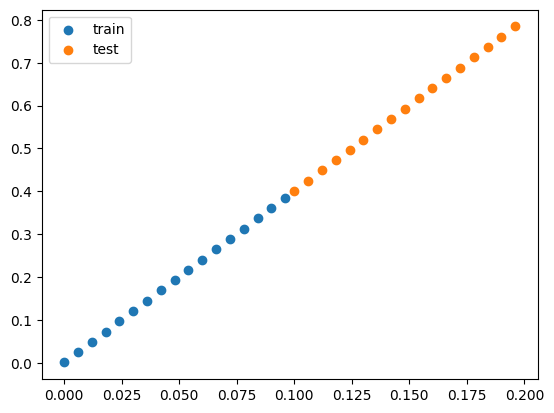

In [ ]:
plot_each = 15

plt.scatter(X_train[::plot_each, 0], y_train[::plot_each], label='train')
plt.scatter(X_test[::plot_each, 0], y_test[::plot_each], label='test')
plt.legend();

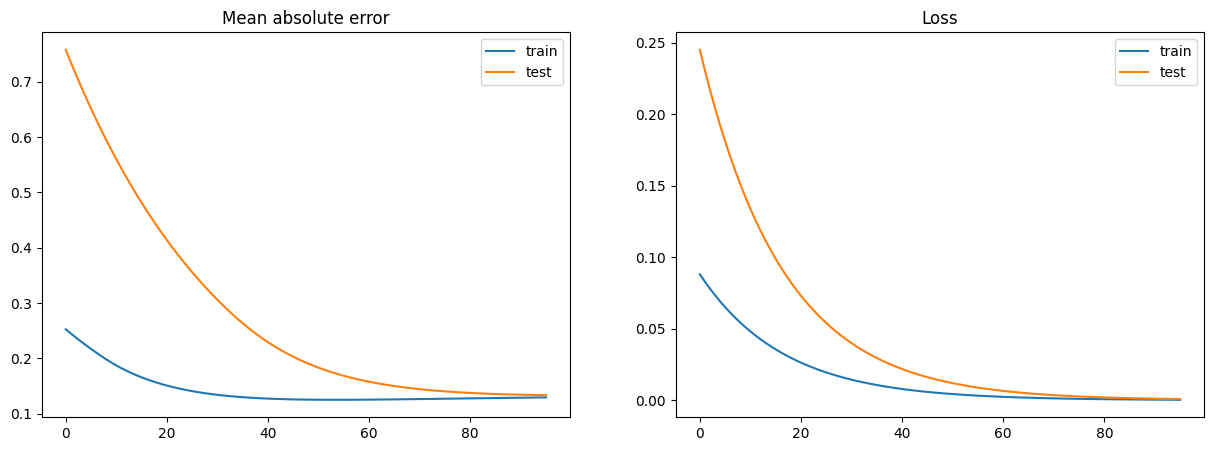

In [ ]:
# define neural net
model = NN(MSELoss())

# add some layers
model.add_layer(LinearLayer(4, 1))

model = train(model, X_train, y_train, minibatch_size=10, epoch=100,
           learning_rate=0.01, X_val=X_test, y_val=y_test, verbose=True)